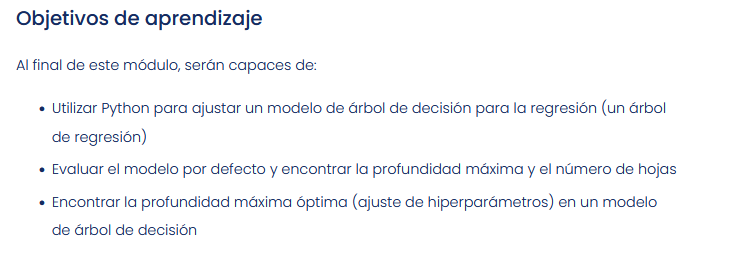

In [3]:
from google.colab import drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [5]:
filename = "/content/drive/MyDrive/Data CodingDojo/cali_housing.csv"
df = pd.read_csv(filename)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Asignar el vector objetivo y la matriz de caracteristicas

In [7]:
y = df["MedHouseVal"]
X = df.drop(columns = "MedHouseVal")

# Modelo de validacion train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

# Arbol de decision

1. Importar el modelo que quieran usar

In [9]:
from sklearn.tree import DecisionTreeClassifier

2. Hacer una instancia del modelo

In [10]:
# Al dejar los paréntesis vacíos, estamos eligiendo utilizar todos los parámetros por defecto
# Para que tengan los mismos resultados, establezcamos nuestro random_state al mismo número
dec_tree = DecisionTreeRegressor(random_state = 42)

3. Ajustar el modelo usando los datos de entrenamiento. El modelo esta aprendiendo la relacion entre las caracteristicas (X) y el objetivo (y).

In [11]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

4. Predecir los valores objetivos para el conjunto de entrenamiento y de prueba

(Nota: Pueden obtener la puntuacion sin este paso, pero si realmente quieren ver donde estan las predicciones, este es un paso util)

In [13]:
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

5. Evaluar el modelo

In [14]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.600578011919574


La metrica de evaluacion que se uso aqui es R^2. Deberia estar claro que el arbol de decision por defecto tiene una puntuacion R^2 mucho mas alta en los datos de entrenamiento que en los de prueba. Esta es una indicacion de que el modelo esta sobreajustado.

6. Ajustar el modelo

Para explorar lo que se puede ajustar para un modelo, puede ser muy util simplemente ejecutar el nombre de su modelo instanciado. El resutlado sera todos los parametros que puedan ajustar cuando instancien el tipo de modelo.

In [15]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

Por ahora, afinemos el parametro clave: la profundidad de nuestro arbol

El valor por defecto para max_depth es None, por lo que el modelo que ejecutamos antes no estaba limitado. Antes de comenzar a ajustar este parametro, revisamos cual era la profundidad de nuestro arbol por defecto.

In [17]:
#Profundidad del arbol
dec_tree.get_depth()

36

In [18]:
#nodos hojas
dec_tree.get_n_leaves()

14841

# Encontrar el max_depth optimo (Ajuste de hiperparametro)

En primer lugar, probemos algunas opciones para ver que el cambio de este parametro afecta nuestro modelo.

In [19]:
dec_tree_2 = DecisionTreeRegressor(max_depth=2, random_state = 42)
dec_tree_2.fit(X_train, y_train)
train_2_score = dec_tree_2.score(X_train, y_train)
test_2_score = dec_tree_2.score(X_test, y_test)
print(train_2_score)
print(test_2_score)

0.45120526546918793
0.4308859489546041


Como podemos ver, nuestras puntuaciones en los conjuntos de entrenamiento y de prueba son mucho mas bajas. Esto indica que, con una profundidad maxima de 2, nuestro modelo esta subajustado.

Intentemos algo entre 2 y 36. Cuales son los resultados con una profundidad maxima de 15?

In [20]:
dec_tree_15 = DecisionTreeRegressor(max_depth=15, random_state = 42)
dec_tree_15.fit(X_train, y_train)
train_15_score = dec_tree_15.score(X_train, y_train)
test_15_score = dec_tree_15.score(X_test, y_test)
print(train_15_score)
print(test_15_score)

0.9607711965105608
0.624301329181203


Podemos ver que esto es mejor que una profundidad maxima de 2, y lo hace ligeramente mejor en el conjunto de pruebas que nuestros parametros por defecto.

Puede tomar mucho tiempo intentar manualmente todas las posibilidades en un parametro. Una forma de hacer esto mas rapido de escribir es con una funcion.

(Tengan en cuenta que aprenderemos una manera más avanzada [GridSearch] de hipertunear múltiples parámetros a la vez, así que no se compliquen en escribir estas funciones).

In [21]:
# Lista de valores a probar para max_depth:
max_depth_range = list(range(2, 36))# will try every value between 2 and 36
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)


Para ayudarnos a ver los resultados intentando numerosas profundidades de arbol, el siguiente codigo crea una visualizacion de R2 VS max_depth

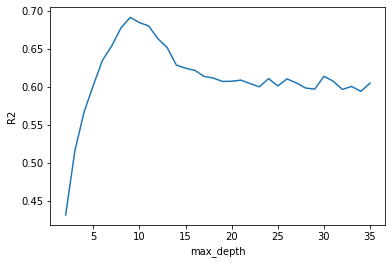

In [22]:
# Visualicen qué max_depth lleva a una puntuación R2 más alta
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');



Segun el grafico anterior, la mejor puntuacion se obtiene con max_depth 9


In [23]:
# Ejecutemos el modelo con nuestro valor optimizado para max_depth
dec_tree_9 = DecisionTreeRegressor(max_depth = 9, random_state = 42)
dec_tree_9.fit(X_train, y_train)
train_9_score = dec_tree_9.score(X_train, y_train)
test_9_score = dec_tree_9.score(X_test, y_test)
print(train_9_score)
print(test_9_score)


0.7961670169616584
0.6913416719998345


Observen que los resultados de entrenamiento y de prueba se acercaron (una senal que hemos reducido el sobreajuste) y que la puntuacion de prueba ha mejorado